# Приоритизация гипотез. Запуск и оценка результатов А/B-теста

Необходимо приоритизировать гипотезы по увеличению выручки в крупном интернет-магазине по заранее подготовленному списку. Затем требуется провести A/B-тест и проанализировать его результаты.

**Описание данных**:

Файл /datasets/hypothesis.csv

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл /datasets/orders.csv. Скачать датасет
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. Скачать датасет
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста


**План работы:** <a id="plan"></a> 

1. [Приоритизация гипотез](#st1)
    - [1.1. Обзор и предобработка данных](#st1_1)
    - [1.2. ICE](#st1_2)
    - [1.3. RICE](#st1_3)
    - [Часть 1. Выводы](#st1_4)
2. [Анализ A/B-теста](#st2)
    - [2.1. Обзор и предобработка данных](#st2_1)
    - [2.2. Анализ](#st2_2)
    - [Часть 2. Выводы](#st2_3)

### [1. Приоритизация гипотез](#plan) <a id="st1"></a>   

#### [1.1. Обзор и предобработка данных](#plan)  <a id="st1_1"></a>   

In [20]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

In [21]:
hypothesis = pd.read_csv('07_hypothesis.csv')
display(hypothesis)
display(hypothesis.info())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

В файле список из 9-ти гопотез, пропусков и проблем с типами данных нет. Скорректируем названия полей и можно приступать к приоритизации.

In [22]:
hypothesis.columns = hypothesis.columns.str.lower()
display(hypothesis.sample())

,hypothesis,reach,impact,confidence,efforts
1,"Запустить собственную службу доставки, что сок...",2,5,4,10


#### [1.2. ICE](#plan) <a id="st1_2"></a>   

In [23]:
# Посчитаем и добавим в таблицу ICE для каждой гипотезы:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
display(hypothesis[['hypothesis', 'ICE']].sort_values('ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Самая перспективные гипотезы по ICE: 8, 0, 7 и 6

#### [1.3. RICE](#plan) <a id="st1_3"></a> 

In [24]:
# Посчитаем и добавим в таблицу RICE для каждой гипотезы:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
display(hypothesis[['hypothesis', 'RICE']].sort_values('RICE', ascending=False))

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


По RICE наиболее перспективные гипотезы: **7**, 2, 0 и 6

#### [Часть 1. Выводы](#plan) <a id="st1_4"></a> 

In [25]:
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2


При определении приоритета гипотезы стоит учитывать не только влияние на пользователей, затраты и степень уверенности в самой гипотезе, но и охват - число пользователей, которых она затронет. 
Гипотеза 7 существенно вырвалась вперёд, т.к. помимо высоких `impact` и `confidence`, коснётся **всех** пользователей сайта. 

Также можно заметить, что топ-5 гипотез для обоих подходов одинаков по составу.

### [2. Анализ A/B-теста](#plan) <a id="st2"></a>   

#### [2.1. Обзор и предобработка данных](#plan) <a id="st2_1"></a>   

In [26]:
orders = pd.read_csv('07_orders.csv')
visitors = pd.read_csv('07_visitors.csv')

In [27]:
# Рассмотрим таблицу с заказами:
display(orders.head(5))
display(orders.info())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

В базе информация по 1197 заказам. Пропущенных значений нет.

Необходимо:
- скорректировать названия полей
- привести тип поля `date` к datetime

In [28]:
# Рассмотрим таблицу с пользователями:
display(visitors)
display(visitors.info())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

Мы имеем данные о количестве посетителей из групп А и В за август 2019.

Необходимо:
- привести тип поля date к datetime

In [29]:
# Устраним обнаруженные проблемы:
orders.columns = orders.columns.str.lower()
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

#display(orders.info())
#display(visitors.info())

#### [2.2. Анализ](#plan)  <a id="st2_2"></a>   

**2.2.1. График кумулятивной выручки по группам**

In [30]:
# Создадим массив уникальных пар значений дат и групп теста:
datesGroups = orders[['date','group']].drop_duplicates() 

# Соберём агрегированные кумулятивные по дням данные о заказах:
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[(orders['date'] <= x['date']) & (orders['group'] == x['group'])]
                        .agg({'date':'max', 'group':'max', 'transactionid':pd.Series.nunique, 'visitorid':pd.Series.nunique, 'revenue':'sum'}), axis=1)
                    .sort_values(by=['date','group']) 
                   )
display(ordersAggregated.head(6))

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
310,2019-08-03,B,61,59,380996


In [31]:
# Соберём агрегированные кумулятивные по дням данные о посетителях:
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[(visitors['date'] <= x['date']) & (visitors['group'] == x['group'])]
                          .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
                     )
display(visitorsAggregated.head(6))

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
310,2019-08-03,B,1803


In [32]:
# Объединим кумулятивные данные в одной таблице:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(6)) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
5,2019-08-03,B,61,59,380996,1803


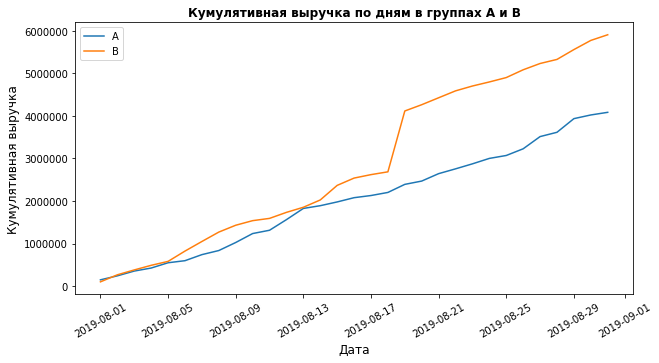

In [33]:
# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по дням в группах А и В', fontsize=12, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кумулятивная выручка', fontsize=12)
plt.xticks(rotation=30)
plt.legend() 
plt.show()

- Выручка в группе А почти равномерно увеличивается на протяжении всего теста.
- Выручка в группе В также увеличивается, но с заметным скачком почти в середине теста. Возможно, имело место большое количество заказов в группе В или же всплеск их стоимости.
- Почти на всём протяжении теста кумулятивная выручка в группе В больше, чем в А.

**2.2.2. График кумулятивного среднего чека по группам**

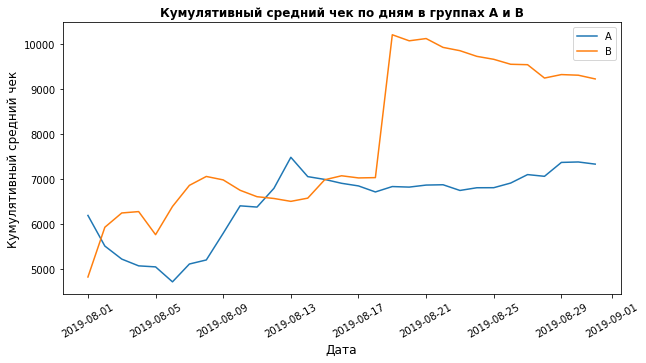

In [34]:
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по дням в группах А и В', fontsize=12, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кумулятивный средний чек', fontsize=12)
plt.xticks(rotation=30)
plt.legend() 
plt.show()

- Средний чек в группе А выравнивается к середине теста.
- Средний чек в группе В одномоментно существенно вырос и теперь ему требуется больше времени, чтобы прийти к своему реальному среднему значению. Вероятно, имела место одна или несколько очень дорогих покупок.

**2.2.3. График относительного изменения кумулятивного среднего чека группы B к группе A**

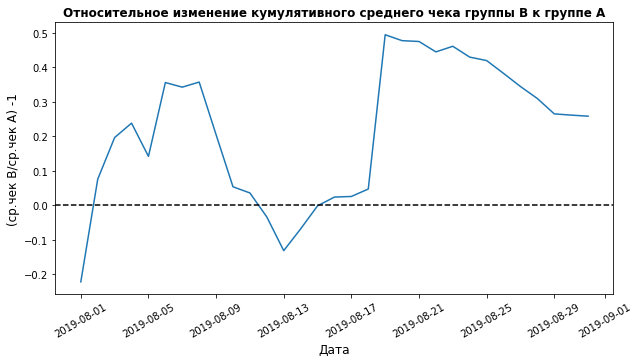

In [35]:
# Собираем данные в одном датафрейме:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A', fontsize=12, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('(ср.чек В/ср.чек А) -1', fontsize=12)
plt.xticks(rotation=30)
plt.show()

- График резко скачет в нескольких точках - определённо, имеют место какие-то выбросы.

**2.2.4. График кумулятивной конверсии по группам**

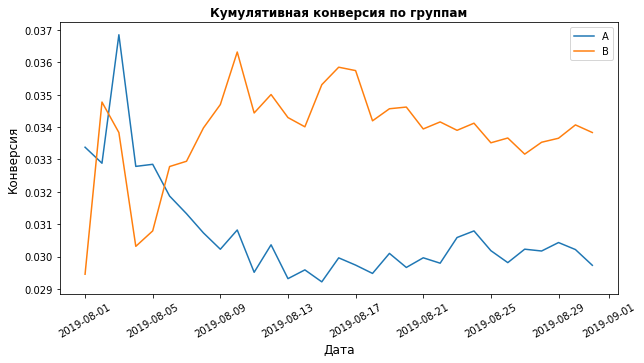

In [37]:
# Считаем кумулятивную конверсию:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# Данные по группе A:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# Данные по группе B:
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(10,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
#plt.axis(['2019-08-01', '2019-08-31', 0.015, 0.05]) 
plt.title('Кумулятивная конверсия по группам', fontsize=12, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Конверсия', fontsize=12)
plt.xticks(rotation=30)
plt.show()

- Сначала конверсии колебались, но довольно быстро выровнялись и результат группы В оказался стабильно лучше, чем в группе А.

**2.2.5. График относительного изменения кумулятивной конверсии группы B к группе A**

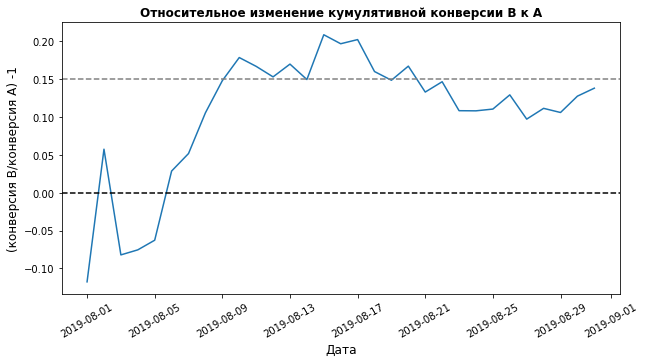

In [40]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
#plt.axis(['2019-08-01', '2019-08-31', -0.2, 0.3]) 
plt.title('Относительное изменение кумулятивной конверсии В к А', fontsize=12, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('(конверсия В/конверсия А) -1', fontsize=12)
plt.xticks(rotation=30)
plt.show()

- Вскоре после начала теста конверсия группы В опередила конверсию А и до конца теста оставалась выше.
- На графике есть скачки, которые могут говорить о наличии выбросов в данных.

**2.2.6. График количества заказов по пользователям**

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders, dtype: float64

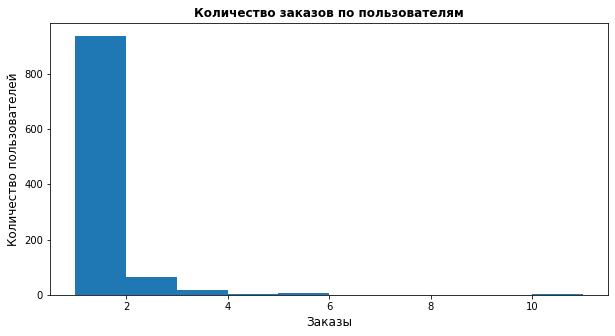

In [41]:
# Датафрейм с количеством заказов по пользователям:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsers.columns = ['visitorid','orders']
#display(ordersByUsers.sort_values(by='orders',ascending=False).head(10)) 
display(ordersByUsers['orders'].describe())

plt.figure(figsize=(10,5))
plt.hist(ordersByUsers['orders']) 
plt.title('Количество заказов по пользователям', fontsize=12, fontweight='bold')
plt.xlabel('Заказы', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.show()

- Большинство пользователей оформляли заказ единожды. 

Построим точечную диаграмму числа заказов на одного пользователя.

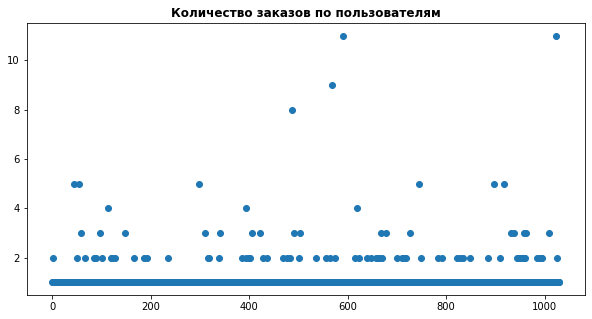

In [42]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(10,5))
plt.title('Количество заказов по пользователям', fontsize=12, fontweight='bold')
plt.scatter(x_values, ordersByUsers['orders']) 
plt.show()

- Много пользователей с 2-3 заказами. Нужно определить их точную долю, чтобы понять можно ли считать их выбросами или нет.

**2.2.7. Определение границы количества заказов на пользователя**

In [43]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


- Не более 5% пользователей оформляли более 2-х заказов, и не более 1% - свыше 4-х заказов.

Примем **3 заказа** за верхнюю границу числа заказов на одного пользователя. 

**2.2.8. График стоимостей заказов**

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

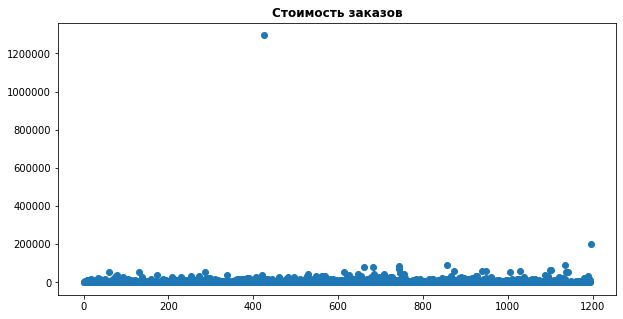

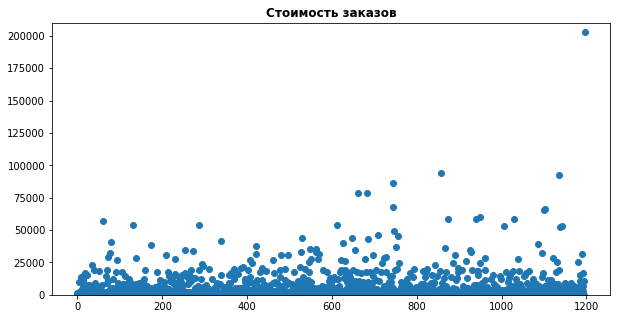

In [44]:
display(orders['revenue'].describe())

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов', fontsize=12, fontweight='bold')
plt.show()

plt.figure(figsize=(10,5))
plt.ylim(0, 210000)
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов', fontsize=12, fontweight='bold')
plt.show()

- В данных оказался один очень крупный заказ (~1.3 млн. руб.), который существенно влияет на результаты теста.
- Так же заметны и другие выбросы - необходимо определить верхнюю границу стоимости заказа.

**2.2.9. Определение границы стоимости заказа**

In [45]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[18168.  28000.  58233.2]


- Не более 5% заказов дороже 28 000 руб. и не более 1% дороже 58 233 руб.

Примем **30 000 руб.** за верхнюю границу стоимости заказа.

**2.2.10. Статистическая значимость различий в конверсии между группами по «сырым» данным**

In [46]:
# Подготовим датафрейм с фактическими и кумулятивными данными по дням:

visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = (visitorsADaily
                        .apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                               .agg({'date':'max', 'visitorsPerDateA':'sum'}), axis=1)
                       )
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = (visitorsBDaily
                        .apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                               .agg({'date':'max', 'visitorsPerDateB':'sum'}), axis=1)
                       )
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (orders[orders['group']=='A'][['date', 'transactionid', 'visitorid', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'transactionid':pd.Series.nunique, 'revenue':'sum'})
               )
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = (ordersADaily
                      .apply(lambda x:ordersADaily[ordersADaily['date'] <= x['date']]
                             .agg({
                                    'date':'max',
                                    'ordersPerDateA':'sum',
                                    'revenuePerDateA':'sum'}), axis=1)
                      .sort_values(by=['date'])
                     )
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = (orders[orders['group']=='B'][['date', 'transactionid', 'visitorid', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'transactionid':pd.Series.nunique, 'revenue':'sum'})
               )
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = (ordersBDaily
                      .apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]
                             .agg({
                                    'date':'max',
                                    'ordersPerDateB':'sum',
                                    'revenuePerDateB' : 'sum'}), axis=1)
                      .sort_values(by=['date'])
                     )
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = (ordersADaily
        .merge(ordersBDaily, left_on='date', right_on='date', how='left')
        .merge(ordersACummulative, left_on='date', right_on='date', how='left')
        .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
        .merge(visitorsADaily, left_on='date', right_on='date', how='left')
        .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
        .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
        .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
       )

display(data.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [47]:
# Создадим для каждой группы датафрейм с количеством заказов на пользователя:

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid':pd.Series.nunique})
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid':pd.Series.nunique})
ordersByUsersB.columns = ['visitorid', 'orders'] 

In [48]:
# Создадим списки с числом заказов каждого пользователя, включая нули:

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [49]:
# Функция для проверки гипотезы о равенстве групп dataA и dataB
def stat_significance(dataA, dataB):
    # Нулевая гипотеза H0: между группами dataA и dataB нет статистически значимой разницы
    alpha = 0.05
    p_value = stats.mannwhitneyu(dataA, dataB)[1]

    print("P-value: {0:.3f}".format(p_value))

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
    print("Относительный выигрыш/проигрыш В к А: {0:.1%}".format(dataB.mean()/dataA.mean()-1))

In [50]:
stat_significance(sampleA, sampleB)

P-value: 0.008
Отвергаем нулевую гипотезу: между группами есть разница
Относительный выигрыш/проигрыш В к А: 13.8%


- По не очищенным от выбросов данным между конверсиями групп А и В **есть** статистически значимая **разница**
- При этом относительный выигрыш группы В равен 13.8%

**2.2.11. Статистическая значимость различий в среднем чеке по «сырым» данным**

In [51]:
stat_significance(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

P-value: 0.365
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный выигрыш/проигрыш В к А: 25.9%


- Нет оснований считать, что средний чек группы В отличается от среднего чека группы А
- При этом выигрыш среднего чека группы В относительно А равен 25.9%

Мы наблюдаем силу непараметрического теста (U-критерий Манна-Уитни), который позволяет исключить влияние выбросов на результат.

**2.2.12. Статистическая значимость различий в конверсии между группами по очищенным данным**

In [52]:
# Выделим из базы "аномальных" пользователей (совершивших более 3-х заказов или сумма заказа которых > 30000):

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorid'], ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorid']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print()
print('\033[1m', 'Количество "аномальных" пользователей:', abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitorid, dtype: int64

 Количество "аномальных" пользователей: 57


In [53]:
# Создадим списки с числом заказов каждого пользователя, включая нули, но уже по очищенным данным:

sampleAFiltered = pd.concat([ordersByUsersA[~(ordersByUsersA['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[~(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

In [54]:
stat_significance(sampleAFiltered, sampleBFiltered)

P-value: 0.009
Отвергаем нулевую гипотезу: между группами есть разница
Относительный выигрыш/проигрыш В к А: 14.8%


- По очищенным данным между конверсиями групп А и В по-прежнему **есть** статистически значимая **разница**
- При этом относительный выигрыш группы В увеличился на 1% по сравнению с "сырыми" данными и стал равен 14.8%

**2.2.13. Статистическая значимость различий в среднем чеке по очищенным данным**

In [55]:
(stat_significance(
    orders[(orders['group']=='A') & ~(orders['visitorid'].isin(abnormalUsers))]['revenue'], 
    orders[(orders['group']=='B') & ~(orders['visitorid'].isin(abnormalUsers))]['revenue'])
)

P-value: 0.479
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный выигрыш/проигрыш В к А: -2.0%


- По-прежнему, нет оснований считать, что средний чек группы В отличается от среднего чека группы А
- По очищенным данным **проигрыш** среднего чека группы В относительно А равен 2%

#### [Часть 2. Выводы](#plan)  <a id="st2_3"></a>   

- И по "сырым" и по очищенным от выбросов данным между конверсиями групп А и В **есть статистически значимая разница**. Конверсия группы В выше, чем в А, на 14-15%
- И по "сырым" и по очищенным данным нет оснований считать, что средний чек группы В отличается от среднего чека группы А.
- График относительного изменения кумулятивной конверсии группы B к группе A показывает, что результаты группы В стабильно лучше группы А.

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным - **фиксируем победу группы В**. Средний чек выше не стал, зато значительно увеличилась конверсия.